# Lecture 9 - Natural Language Processing

## Load Data

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
%matplotlib inline

# Replace with new URLs for various categories
seed_urls = [
    'https://www.theverge.com/tech',   # Technology
    'https://www.bbc.com/sport',       # Sports
    'https://www.cnn.com/world',       # World News
    'https://www.bloomberg.com/markets' # Business
]

def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        # Adjust the scraping logic to match the website's structure
        news_articles = [{'news_headline': headline.get_text(strip=True),
                          'news_article': article.get_text(strip=True),
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('h2'),  # Example selector for headlines
                                 soup.find_all('p'))    # Example selector for articles
                        ]
        news_data.extend(news_articles)
        
    df = pd.DataFrame(news_data)
    pd.set_option('display.max_colwidth', None)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

# Run the function and display the DataFrame
news_df = build_dataset(seed_urls)
news_df.head()


,news_headline,news_article,news_category
0,Featured stories,"The latest tech news about the world's best (and sometimes worst) hardware, apps, and much more. From top companies like Google and Apple to tiny startups vying for your attention, Verge Tech has the latest in what matters in technology daily.",tech
1,Steam’s built-in game recording is now available to all,"Steam Game Recording is officially out of beta, giving players the ability to record gameplay without a separate app.",tech
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,GM’s Baris Cetinok is committed to building a custom experience to rival that of Apple and Google.,tech
3,The hyperloop lives on as a 1/12th scale model in Switzerland,"The next movie fromParasitedirector Bong Joon Ho is now coming out on April 18th,Deadlinereports. It had been set to debuton January 31st— and originally, it had been scheduled tocome out sometime this year.",tech
4,Advertiser Content,"If you haven’t seen film’s trailer yet,you should, it’s great.",tech


In [14]:
# Now check the value counts for the news_category
news_df.news_category.value_counts()


news_category
tech       38
world      12
sport       9
markets     1
Name: count, dtype: int64

## Text Preprocessing

### Noise Removal

In [15]:
# Run the function and display the DataFrame
news_df = build_dataset(seed_urls)

# Lower Case
news_df['news_article'] = news_df['news_article'].apply(lambda x: " ".join(x.lower() for x in x.split()))
news_df.head()

,news_headline,news_article,news_category
0,Featured stories,"the latest tech news about the world's best (and sometimes worst) hardware, apps, and much more. from top companies like google and apple to tiny startups vying for your attention, verge tech has the latest in what matters in technology daily.",tech
1,Steam’s built-in game recording is now available to all,"steam game recording is officially out of beta, giving players the ability to record gameplay without a separate app.",tech
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,gm’s baris cetinok is committed to building a custom experience to rival that of apple and google.,tech
3,The hyperloop lives on as a 1/12th scale model in Switzerland,"the next movie fromparasitedirector bong joon ho is now coming out on april 18th,deadlinereports. it had been set to debuton january 31st— and originally, it had been scheduled tocome out sometime this year.",tech
4,Advertiser Content,"if you haven’t seen film’s trailer yet,you should, it’s great.",tech


In [16]:
# Removing Punctuation
news_df['news_article'] = news_df['news_article'].str.replace('[^\w\s]', '', regex=True)
news_df.head()

,news_headline,news_article,news_category
0,Featured stories,the latest tech news about the worlds best and sometimes worst hardware apps and much more from top companies like google and apple to tiny startups vying for your attention verge tech has the latest in what matters in technology daily,tech
1,Steam’s built-in game recording is now available to all,steam game recording is officially out of beta giving players the ability to record gameplay without a separate app,tech
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,gms baris cetinok is committed to building a custom experience to rival that of apple and google,tech
3,The hyperloop lives on as a 1/12th scale model in Switzerland,the next movie fromparasitedirector bong joon ho is now coming out on april 18thdeadlinereports it had been set to debuton january 31st and originally it had been scheduled tocome out sometime this year,tech
4,Advertiser Content,if you havent seen films trailer yetyou should its great,tech


In [17]:
# Removing Noise Words
noise_list = ["is", "a", "the", "..."]

def _remove_noise(input_text):
    words = input_text.split()
    noise_free_words = [word for word in words if word not in noise_list]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text

# Apply noise removal
news_df['news_article'] = news_df['news_article'].apply(_remove_noise)
news_df.head()

,news_headline,news_article,news_category
0,Featured stories,latest tech news about worlds best and sometimes worst hardware apps and much more from top companies like google and apple to tiny startups vying for your attention verge tech has latest in what matters in technology daily,tech
1,Steam’s built-in game recording is now available to all,steam game recording officially out of beta giving players ability to record gameplay without separate app,tech
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,gms baris cetinok committed to building custom experience to rival that of apple and google,tech
3,The hyperloop lives on as a 1/12th scale model in Switzerland,next movie fromparasitedirector bong joon ho now coming out on april 18thdeadlinereports it had been set to debuton january 31st and originally it had been scheduled tocome out sometime this year,tech
4,Advertiser Content,if you havent seen films trailer yetyou should its great,tech


In [18]:
# Removing Stopwords using SpaCy
import spacy
nlp = spacy.load('en_core_web_sm')

stopwords = nlp.Defaults.stop_words
news_df['news_article'] = news_df['news_article']\
            .apply(lambda x: " ".join(word for word in x.split() if word not in stopwords))

news_df.head()

,news_headline,news_article,news_category
0,Featured stories,latest tech news worlds best worst hardware apps companies like google apple tiny startups vying attention verge tech latest matters technology daily,tech
1,Steam’s built-in game recording is now available to all,steam game recording officially beta giving players ability record gameplay separate app,tech
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,gms baris cetinok committed building custom experience rival apple google,tech
3,The hyperloop lives on as a 1/12th scale model in Switzerland,movie fromparasitedirector bong joon ho coming april 18thdeadlinereports set debuton january 31st originally scheduled tocome year,tech
4,Advertiser Content,havent seen films trailer yetyou great,tech


In [19]:
# Install spaCy if not already installed
#!pip install spacy

# Download the spaCy English model
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta 

In [20]:
# Tokenize using SpaCy and apply to DataFrame

def tokenize_text(text):
    doc = nlp(text)
    tokens = [(token.text, token.pos_) for token in doc]  # Include token label (part of speech)
    return tokens

# Apply tokenization to the DataFrame
news_df['tokens'] = news_df['news_article'].apply(tokenize_text)

# Display the DataFrame with tokens
news_df


,news_headline,news_article,news_category,tokens
0,Featured stories,latest tech news worlds best worst hardware apps companies like google apple tiny startups vying attention verge tech latest matters technology daily,tech,"[(latest, ADJ), (tech, NOUN), (news, NOUN), (worlds, NOUN), (best, ADV), (worst, ADJ), (hardware, NOUN), (apps, NOUN), (companies, NOUN), (like, ADP), (google, PROPN), (apple, PROPN), (tiny, ADJ), (startups, NOUN), (vying, VERB), (attention, NOUN), (verge, NOUN), (tech, NOUN), (latest, ADJ), (matters, VERB), (technology, NOUN), (daily, ADV)]"
1,Steam’s built-in game recording is now available to all,steam game recording officially beta giving players ability record gameplay separate app,tech,"[(steam, NOUN), (game, NOUN), (recording, NOUN), (officially, ADV), (beta, NOUN), (giving, VERB), (players, NOUN), (ability, NOUN), (record, NOUN), (gameplay, NOUN), (separate, ADJ), (app, NOUN)]"
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,gms baris cetinok committed building custom experience rival apple google,tech,"[(gms, PROPN), (baris, PROPN), (cetinok, PROPN), (committed, VERB), (building, VERB), (custom, NOUN), (experience, NOUN), (rival, NOUN), (apple, PROPN), (google, PROPN)]"
3,The hyperloop lives on as a 1/12th scale model in Switzerland,movie fromparasitedirector bong joon ho coming april 18thdeadlinereports set debuton january 31st originally scheduled tocome year,tech,"[(movie, NOUN), (fromparasitedirector, NOUN), (bong, PROPN), (joon, PROPN), (ho, PROPN), (coming, VERB), (april, PROPN), (18thdeadlinereports, NUM), (set, VERB), (debuton, PROPN), (january, PROPN), (31st, NOUN), (originally, ADV), (scheduled, VERB), (tocome, ADJ), (year, NOUN)]"
4,Advertiser Content,havent seen films trailer yetyou great,tech,"[(have, AUX), (nt, PART), (seen, VERB), (films, NOUN), (trailer, NOUN), (yetyou, NOUN), (great, ADJ)]"
5,Take-Two is selling its indie games label Private Division,industry minister françoisphilippe champagnesays government actingto address specific national security risks related bytedance ltds operations canada,tech,"[(industry, PROPN), (minister, PROPN), (françoisphilippe, PROPN), (champagnesays, PROPN), (government, PROPN), (actingto, PROPN), (address, VERB), (specific, ADJ), (national, ADJ), (security, NOUN), (risks, NOUN), (related, VERB), (bytedance, NOUN), (ltds, PROPN), (operations, NOUN), (canada, PROPN)]"
6,The FTC orders Sitejabber to stop faking product reviews,canada attempting toban control tiktok app,tech,"[(canada, PROPN), (attempting, VERB), (toban, ADJ), (control, NOUN), (tiktok, NOUN), (app, NOUN)]"
7,NYT tech workers are making their own games while on strike,government blocking canadians access tiktok application ability create content decision use social media application platform personal choice,tech,"[(government, NOUN), (blocking, VERB), (canadians, PROPN), (access, NOUN), (tiktok, NOUN), (application, NOUN), (ability, NOUN), (create, VERB), (content, NOUN), (decision, NOUN), (use, NOUN), (social, ADJ), (media, NOUN), (application, NOUN), (platform, NOUN), (personal, ADJ), (choice, NOUN)]"
8,Microsoft’s new emulator could bring more games to Windows on Arm,tiktok hasresponded saying challenge order court,tech,"[(tiktok, NOUN), (hasresponded, VERB), (saying, VERB), (challenge, NOUN), (order, NOUN), (court, NOUN)]"
9,Roblox is banning kids from ‘social hangout’ spaces,government canada,tech,"[(government, PROPN), (canada, PROPN)]"


In [21]:
# Apply token frequency calculation to a specific row for demonstration
def get_token_frequencies(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    token_freq = Counter(tokens)
    return token_freq

# Apply tokenization to the DataFrame
news_df['tokens'] = news_df['news_article'].apply(tokenize_text)

# Display the DataFrame with tokens
news_df.head()

from collections import Counter
# Display POS tagging results for the first article
def display_pos_tagging(doc):
    for token in doc:
        print(f"Token: {token.text}, POS: {token.pos_}")

doc = nlp(news_df['news_article'].iloc[0])
display_pos_tagging(doc)

# Calculate and display frequency distribution of tokens
token_frequencies = get_token_frequencies(news_df['news_article'].iloc[0])
print(token_frequencies.most_common(2))


Token: latest, POS: ADJ
Token: tech, POS: NOUN
Token: news, POS: NOUN
Token: worlds, POS: NOUN
Token: best, POS: ADV
Token: worst, POS: ADJ
Token: hardware, POS: NOUN
Token: apps, POS: NOUN
Token: companies, POS: NOUN
Token: like, POS: ADP
Token: google, POS: PROPN
Token: apple, POS: PROPN
Token: tiny, POS: ADJ
Token: startups, POS: NOUN
Token: vying, POS: VERB
Token: attention, POS: NOUN
Token: verge, POS: NOUN
Token: tech, POS: NOUN
Token: latest, POS: ADJ
Token: matters, POS: VERB
Token: technology, POS: NOUN
Token: daily, POS: ADV
[('latest', 2), ('tech', 2)]


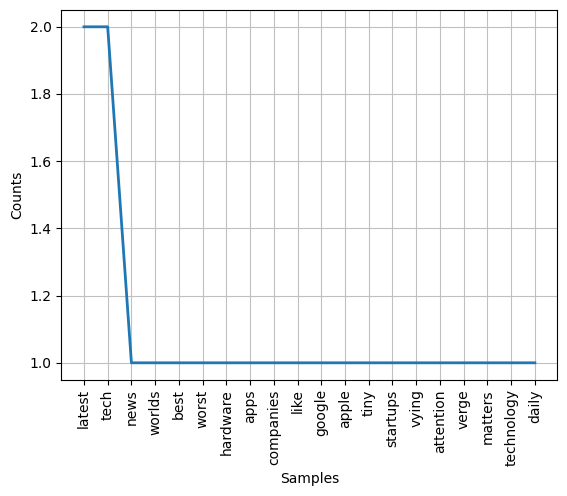

In [22]:
# Frequency Distribution Plot
# Plot the frequency distribution of the 30 most common words
fdist = FreqDist(token_frequencies)
fdist.plot(30, cumulative=False)
plt.show()


### Lexicon Normalization

In [23]:
# Stemming
from nltk.stem import PorterStemmer

# Initialize the stemmer
st = PorterStemmer()

# Apply stemming to the 'news_article' column
news_df['news_article'] = news_df['news_article'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
news_df.head()


,news_headline,news_article,news_category,tokens
0,Featured stories,latest tech news world best worst hardwar app compani like googl appl tini startup vy attent verg tech latest matter technolog daili,tech,"[(latest, ADJ), (tech, NOUN), (news, NOUN), (worlds, NOUN), (best, ADV), (worst, ADJ), (hardware, NOUN), (apps, NOUN), (companies, NOUN), (like, ADP), (google, PROPN), (apple, PROPN), (tiny, ADJ), (startups, NOUN), (vying, VERB), (attention, NOUN), (verge, NOUN), (tech, NOUN), (latest, ADJ), (matters, VERB), (technology, NOUN), (daily, ADV)]"
1,Steam’s built-in game recording is now available to all,steam game record offici beta give player abil record gameplay separ app,tech,"[(steam, NOUN), (game, NOUN), (recording, NOUN), (officially, ADV), (beta, NOUN), (giving, VERB), (players, NOUN), (ability, NOUN), (record, NOUN), (gameplay, NOUN), (separate, ADJ), (app, NOUN)]"
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,gm bari cetinok commit build custom experi rival appl googl,tech,"[(gms, PROPN), (baris, PROPN), (cetinok, PROPN), (committed, VERB), (building, VERB), (custom, NOUN), (experience, NOUN), (rival, NOUN), (apple, PROPN), (google, PROPN)]"
3,The hyperloop lives on as a 1/12th scale model in Switzerland,movi fromparasitedirector bong joon ho come april 18thdeadlinereport set debuton januari 31st origin schedul tocom year,tech,"[(movie, NOUN), (fromparasitedirector, NOUN), (bong, PROPN), (joon, PROPN), (ho, PROPN), (coming, VERB), (april, PROPN), (18thdeadlinereports, NUM), (set, VERB), (debuton, PROPN), (january, PROPN), (31st, NOUN), (originally, ADV), (scheduled, VERB), (tocome, ADJ), (year, NOUN)]"
4,Advertiser Content,havent seen film trailer yetyou great,tech,"[(have, AUX), (nt, PART), (seen, VERB), (films, NOUN), (trailer, NOUN), (yetyou, NOUN), (great, ADJ)]"


In [24]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk

# Download WordNet if not already downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')  # For more word meanings support

# Initialize the lemmatizer
lem = WordNetLemmatizer()

# Apply lemmatization to the 'news_article' column
news_df['news_article'] = news_df['news_article'].apply(lambda x: " ".join([lem.lemmatize(word, "v") for word in x.split()]))

# Display the first few rows of the DataFrame after lemmatization
news_df.head()


[nltk_data] Downloading package wordnet to C:\Users\David
[nltk_data]     Ho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\David
[nltk_data]     Ho/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,news_headline,news_article,news_category,tokens
0,Featured stories,latest tech news world best worst hardwar app compani like googl appl tini startup vy attent verg tech latest matter technolog daili,tech,"[(latest, ADJ), (tech, NOUN), (news, NOUN), (worlds, NOUN), (best, ADV), (worst, ADJ), (hardware, NOUN), (apps, NOUN), (companies, NOUN), (like, ADP), (google, PROPN), (apple, PROPN), (tiny, ADJ), (startups, NOUN), (vying, VERB), (attention, NOUN), (verge, NOUN), (tech, NOUN), (latest, ADJ), (matters, VERB), (technology, NOUN), (daily, ADV)]"
1,Steam’s built-in game recording is now available to all,steam game record offici beta give player abil record gameplay separ app,tech,"[(steam, NOUN), (game, NOUN), (recording, NOUN), (officially, ADV), (beta, NOUN), (giving, VERB), (players, NOUN), (ability, NOUN), (record, NOUN), (gameplay, NOUN), (separate, ADJ), (app, NOUN)]"
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,gm bari cetinok commit build custom experi rival appl googl,tech,"[(gms, PROPN), (baris, PROPN), (cetinok, PROPN), (committed, VERB), (building, VERB), (custom, NOUN), (experience, NOUN), (rival, NOUN), (apple, PROPN), (google, PROPN)]"
3,The hyperloop lives on as a 1/12th scale model in Switzerland,movi fromparasitedirector bong joon ho come april 18thdeadlinereport set debuton januari 31st origin schedul tocom year,tech,"[(movie, NOUN), (fromparasitedirector, NOUN), (bong, PROPN), (joon, PROPN), (ho, PROPN), (coming, VERB), (april, PROPN), (18thdeadlinereports, NUM), (set, VERB), (debuton, PROPN), (january, PROPN), (31st, NOUN), (originally, ADV), (scheduled, VERB), (tocome, ADJ), (year, NOUN)]"
4,Advertiser Content,havent see film trailer yetyou great,tech,"[(have, AUX), (nt, PART), (seen, VERB), (films, NOUN), (trailer, NOUN), (yetyou, NOUN), (great, ADJ)]"


In [25]:
# Lemmatize each word in the 'news_article' column as nouns
news_df['news_article'] = news_df['news_article'].apply(lambda x: " ".join([lem.lemmatize(word, "n") for word in x.split()]))

# Display the first few rows of the DataFrame after noun lemmatization
news_df.head()


,news_headline,news_article,news_category,tokens
0,Featured stories,latest tech news world best worst hardwar app compani like googl appl tini startup vy attent verg tech latest matter technolog daili,tech,"[(latest, ADJ), (tech, NOUN), (news, NOUN), (worlds, NOUN), (best, ADV), (worst, ADJ), (hardware, NOUN), (apps, NOUN), (companies, NOUN), (like, ADP), (google, PROPN), (apple, PROPN), (tiny, ADJ), (startups, NOUN), (vying, VERB), (attention, NOUN), (verge, NOUN), (tech, NOUN), (latest, ADJ), (matters, VERB), (technology, NOUN), (daily, ADV)]"
1,Steam’s built-in game recording is now available to all,steam game record offici beta give player abil record gameplay separ app,tech,"[(steam, NOUN), (game, NOUN), (recording, NOUN), (officially, ADV), (beta, NOUN), (giving, VERB), (players, NOUN), (ability, NOUN), (record, NOUN), (gameplay, NOUN), (separate, ADJ), (app, NOUN)]"
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,gm bari cetinok commit build custom experi rival appl googl,tech,"[(gms, PROPN), (baris, PROPN), (cetinok, PROPN), (committed, VERB), (building, VERB), (custom, NOUN), (experience, NOUN), (rival, NOUN), (apple, PROPN), (google, PROPN)]"
3,The hyperloop lives on as a 1/12th scale model in Switzerland,movi fromparasitedirector bong joon ho come april 18thdeadlinereport set debuton januari 31st origin schedul tocom year,tech,"[(movie, NOUN), (fromparasitedirector, NOUN), (bong, PROPN), (joon, PROPN), (ho, PROPN), (coming, VERB), (april, PROPN), (18thdeadlinereports, NUM), (set, VERB), (debuton, PROPN), (january, PROPN), (31st, NOUN), (originally, ADV), (scheduled, VERB), (tocome, ADJ), (year, NOUN)]"
4,Advertiser Content,havent see film trailer yetyou great,tech,"[(have, AUX), (nt, PART), (seen, VERB), (films, NOUN), (trailer, NOUN), (yetyou, NOUN), (great, ADJ)]"


In [26]:
# Object Standardization
lookup_dict = {
    'rt': 'Retweet',
    'dm': 'direct message',
    'awsm': 'awesome',
    'luv': 'love'
}

# Function to replace words based on the lookup dictionary
def _lookup_words(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]  # Replace with dictionary value if found

        new_words.append(word)
    
    # Join the words back into a single string
    new_text = " ".join(new_words)
    return new_text

# Test the function with a sample input
sample_text = "RT this is a retweeted tweet by Shivam Bansal"
standardized_text = _lookup_words(sample_text)
print("Original Text:", sample_text)
print("Standardized Text:", standardized_text)


Original Text: RT this is a retweeted tweet by Shivam Bansal
Standardized Text: Retweet this is a retweeted tweet by Shivam Bansal


## Feature Engineering (Restart Kernel here!!!)

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
%matplotlib inline

# Replace with new URLs for various categories
seed_urls = [
    'https://www.theverge.com/tech',   # Technology
    'https://www.bbc.com/sport',       # Sports
    'https://www.cnn.com/world',       # World News
    'https://www.bloomberg.com/markets' # Business
]

def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        # Adjust the scraping logic to match the website's structure
        news_articles = [{'news_headline': headline.get_text(strip=True),
                          'news_article': article.get_text(strip=True),
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('h2'),  # Example selector for headlines
                                 soup.find_all('p'))    # Example selector for articles
                        ]
        news_data.extend(news_articles)
        
    df = pd.DataFrame(news_data)
    pd.set_option('display.max_colwidth', None)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

# Run the function and display the DataFrame
news_df = build_dataset(seed_urls)
news_df.head()


,news_headline,news_article,news_category
0,Featured stories,"The latest tech news about the world's best (and sometimes worst) hardware, apps, and much more. From top companies like Google and Apple to tiny startups vying for your attention, Verge Tech has the latest in what matters in technology daily.",tech
1,Steam’s built-in game recording is now available to all,"Steam Game Recording is officially out of beta, giving players the ability to record gameplay without a separate app.",tech
2,GM software boss: we have ‘high conviction’ ditching CarPlay is the right path,GM’s Baris Cetinok is committed to building a custom experience to rival that of Apple and Google.,tech
3,The hyperloop lives on as a 1/12th scale model in Switzerland,"The next movie fromParasitedirector Bong Joon Ho is now coming out on April 18th,Deadlinereports. It had been set to debuton January 31st— and originally, it had been scheduled tocome out sometime this year.",tech
4,Advertiser Content,"If you haven’t seen film’s trailer yet,you should, it’s great.",tech


In [21]:
import spacy

# Load the English model
nlp = spacy.load('en_core_web_sm')

# Sample text for POS tagging
text = "I am learning Text Analytics at IVE(TY)."

# Process the text
doc = nlp(text)

# Tokenization and POS tagging
for token in doc:
    print(f"Token: {token.text}, POS Tag: {token.pos_}")



Token: I, POS Tag: PRON
Token: am, POS Tag: AUX
Token: learning, POS Tag: VERB
Token: Text, POS Tag: PROPN
Token: Analytics, POS Tag: PROPN
Token: at, POS Tag: ADP
Token: IVE(TY, POS Tag: NUM
Token: ), POS Tag: PUNCT
Token: ., POS Tag: PUNCT


In [22]:
# Part of Speech (POS) Tagging using spaCy
import spacy

# Install the spaCy model if not already installed:
# Run this command in the terminal: python -m spacy download en_core_web_sm

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Sample text
text = "I am learning Text Analytics at IVE(TY)."

# Process the text using spaCy
doc = nlp(text)

# Tokenization and POS tagging
for token in doc:
    print(f"Token: {token.text}, POS Tag: {token.pos_}")


Token: I, POS Tag: PRON
Token: am, POS Tag: AUX
Token: learning, POS Tag: VERB
Token: Text, POS Tag: PROPN
Token: Analytics, POS Tag: PROPN
Token: at, POS Tag: ADP
Token: IVE(TY, POS Tag: NUM
Token: ), POS Tag: PUNCT
Token: ., POS Tag: PUNCT


In [23]:
!pip install textblob


In [24]:
# Install spaCy and the language model if not already installed
#!pip install spacy
#!python -m spacy download en_core_web_sm

# Import spaCy
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Function to generate n-grams
def generate_ngrams_spacy(text, n=3):
    doc = nlp(text)
    ngrams = [doc[i:i+n] for i in range(len(doc) - n + 1)]
    return ngrams

# Process an article from the DataFrame
article = news_df['news_article'].iloc[1]  # Use any specific index or iterate through the DataFrame
ngrams = generate_ngrams_spacy(article, n=3)

# Display the n-grams
print("3-Grams:")
for ngram in ngrams:
    print(ngram.text)


3-Grams:
Steam Game Recording
Game Recording is
Recording is officially
is officially out
officially out of
out of beta
of beta,
beta, giving
, giving players
giving players the
players the ability
the ability to
ability to record
to record gameplay
record gameplay without
gameplay without a
without a separate
a separate app
separate app.


In [25]:
## Statistical Features
# Term frequency (TF)
tf1 = (news_df['news_article'][1:2]).apply(lambda x: \
                    pd.value_counts(x.split(" ")))\
                    .sum(axis = 0).reset_index()
tf1.columns = ['words', 'tf']
tf1.head()

C:\Users\David Ho\AppData\Local\Temp\ipykernel_30356\3399065986.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(x.split(" ")))\
C:\Users\David Ho\AppData\Local\Temp\ipykernel_30356\3399065986.py:4: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts(x.split(" ")))\


,words,tf
0,Steam,1
1,Game,1
2,Recording,1
3,is,1
4,officially,1


In [26]:
# Inverse Document Frequency (IDF)
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(news_df.shape[0]/\
                        (len(news_df[news_df['news_article']\
                        .str.contains(word)])))

tf1.head()

,words,tf,idf
0,Steam,1,4.094345
1,Game,1,3.401197
2,Recording,1,4.094345
3,is,1,0.875469
4,officially,1,4.094345


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Example corpus
corpus = news_df['news_article'].values[:5]  # You can change this to use more data

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print("TF-IDF Matrix:")
print(tfidf_df.head())


TF-IDF Matrix:
       18th      31st   ability     about       and       app     apple  \
0  0.000000  0.000000  0.000000  0.144802  0.290927  0.000000  0.116825   
1  0.000000  0.000000  0.253867  0.000000  0.000000  0.253867  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.184898  0.000000  0.222744   
3  0.164688  0.164688  0.000000  0.000000  0.110293  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       apps     april  attention  ...     verge     vying      what   without  \
0  0.144802  0.000000   0.144802  ...  0.144802  0.144802  0.144802  0.000000   
1  0.000000  0.000000   0.000000  ...  0.000000  0.000000  0.000000  0.253867   
2  0.000000  0.000000   0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.164688   0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000   0.000000  ...  0.000000  0.000000  0.000000  0.000000   

      world     worst      year       yet      

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                        stop_words='english', ngram_range=(1, 1))

# Fit and transform the specific article
news_vect = tfidf.fit_transform(news_df['news_article'][1:2])

# Convert the sparse matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(news_vect.toarray(), columns=tfidf.get_feature_names_out())

# Display the TF-IDF matrix
print("TF-IDF Matrix for the selected article:")
print(tfidf_df)


TF-IDF Matrix for the selected article:
    ability       app      beta      game  gameplay    giving  officially  \
0  0.288675  0.288675  0.288675  0.288675  0.288675  0.288675    0.288675   

    players    record  recording  separate     steam  
0  0.288675  0.288675   0.288675  0.288675  0.288675  


## Important Text Analytics Tasks

### 1. Sentiment Analysis

In [29]:
from textblob import TextBlob

# Apply sentiment analysis on the first 5 articles and display their sentiment
sentiments = news_df['news_article'][:5].apply(lambda x: TextBlob(x).sentiment)
print("Sentiment Analysis for the first 5 articles:")
print(sentiments)


Sentiment Analysis for the first 5 articles:
0    (0.25, 0.5750000000000001)
1                   (-0.4, 0.4)
2                    (0.0, 0.0)
3               (0.1875, 0.375)
4                   (0.8, 0.75)
Name: news_article, dtype: object


In [30]:
# Sentiment Analysis Using NLTK
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(word):
    return dict([(char, True) for char in word])
 
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 
 
# Predict
neg = 0
pos = 0
sentence = "Awesome movie, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')

for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
 
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.6
Negative: 0.2


### 2. Text Classification

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample training data
training_corpus = [
    ('I am exhausted of this work.', 'Class_B'),
    ("I can't cooperate with this", 'Class_B'),
    ('He is my worst enemy!', 'Class_B'),
    ('My management is poor.', 'Class_B'),
    ('I love this burger.', 'Class_A'),
    ('This is an amazing place!', 'Class_A'),
    ('I feel very good about these dates.', 'Class_A'),
    ('This is my best work.', 'Class_A'),
    ("What an awesome view", 'Class_A'),
    ('I do not like this dish', 'Class_B')
]

# Split data into texts and labels
texts, labels = zip(*training_corpus)

# Convert text data to feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Test the classifier
sample_text = ["Their codes are amazing."]
sample_vector = vectorizer.transform(sample_text)
prediction = model.predict(sample_vector)

print(f"Prediction for '{sample_text[0]}': {prediction[0]}")

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Prediction for 'Their codes are amazing.': Class_A
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

     Class_A       0.50      1.00      0.67         1
     Class_B       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\David Ho\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\David Ho\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\David Ho\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Classify a new piece of text
new_text = ["I don't like their computer."]
new_text_vector = vectorizer.transform(new_text)

# Make prediction
prediction = model.predict(new_text_vector)

print(f"Prediction for '{new_text[0]}': {prediction[0]}")


Prediction for 'I don't like their computer.': Class_B


In [34]:
from sklearn.metrics import accuracy_score
test_corpus = [
    ("I am not feeling well today.", 'Class_B'),
    ("I feel brilliant!", 'Class_A'),
    ('Gary is a friend of mine.', 'Class_A'),
    ("I can't believe I'm doing this.", 'Class_B'),
    ('The date was good.', 'Class_A'), ('I do not enjoy my job', 'Class_B')
]
# Extract texts and labels from test_corpus
test_texts, test_labels = zip(*test_corpus)
test_vectors = vectorizer.transform(test_texts)

# Make predictions on the test data
predictions = model.predict(test_vectors)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Model accuracy on the test corpus: {accuracy:.2f}")


Model accuracy on the test corpus: 0.67


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm

# Preparing data for SVM model (using the same training_corpus, test_corpus
#   from naive bayes example)
train_data = []
train_labels = []
for row in training_corpus:
    train_data.append(row[0])
    train_labels.append(row[1])

test_data = []
test_labels = []
for row in test_corpus:
    test_data.append(row[0])
    test_labels.append(row[1])

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)

# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)

# Apply model on test data
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear
model = svm.SVC(kernel='linear')
model.fit(train_vectors, train_labels) 
prediction = model.predict(test_vectors)
print(prediction)
# print(classification_report(test_labels, prediction))

['Class_A' 'Class_A' 'Class_B' 'Class_B' 'Class_A' 'Class_A']


In [36]:
print(classification_report(test_labels, prediction))


              precision    recall  f1-score   support

     Class_A       0.50      0.67      0.57         3
     Class_B       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

